# End-to-end `scivision` pipeline for a pretrained/prebuilt model for tree crown detection

This notebook demonstrates `scivision` to load `detectreeRGB`, a pretrained model to predict the location and extent of tree crowns from a top-down RGB image, captured by drone, aircraft or satellite. `detectreeRGB` was implemented in python 3.8 using Mask R-CNN deployed from [detectron2](https://github.com/facebookresearch/detectron2/blob/main/docs/tutorials/install.md) library to delineate tree crowns accurately.
Further details of the `detectreeRGB` can be found in [the original model repository](https://github.com/shmh40/detectreeRGB).

The code of this notebook let `scivision` to fetch input data from:
https://github.com/acocac/scivision-forest-datasets/drone_tropics.yml

and load the pretrained `detectreeRGB` from:
https://github.com/acocac/scivision-treecrown-plugin

## Install libraries

In [1]:
!pip install scivision
!pip install opencv-python-headless #hide only if the notebook runs in standard desktop environments

     |████████████████████████████████| 47.7 MB 4.7 MB/s            


## Load libraries

In [2]:
from scivision.io import load_dataset, load_pretrained_model
from intake_zenodo_fetcher import download_zenodo_files_for_entry

## Model

In [ ]:
# Load model
scivision_yml = 'https://github.com/acocac/scivision-treecrown-plugin/.scivision-config.yaml'
model = load_pretrained_model(scivision_yml, allow_install=True)

In [ ]:
# let's explore the model object
model

## Data

In [3]:
cat = load_dataset('https://github.com/acocac/scivision-forest-datasets/drone_tropics.yml')

In [4]:
download_zenodo_files_for_entry(cat['sepilok_rgb'], force_download=False)

will download https://zenodo.org/api/files/271e78b4-b605-4731-a127-bd097e639bf8/Sep_2014_RGB_602500_646600.tif to Sep_2014_RGB_602500_646600.tif


  0%|          | 0.00/100 [00:00<?, ?B/s]

[PosixPath('Sep_2014_RGB_602500_646600.tif')]

In [5]:
dataset  = cat["sepilok_rgb"].to_dask()

## Prediction and visualisation

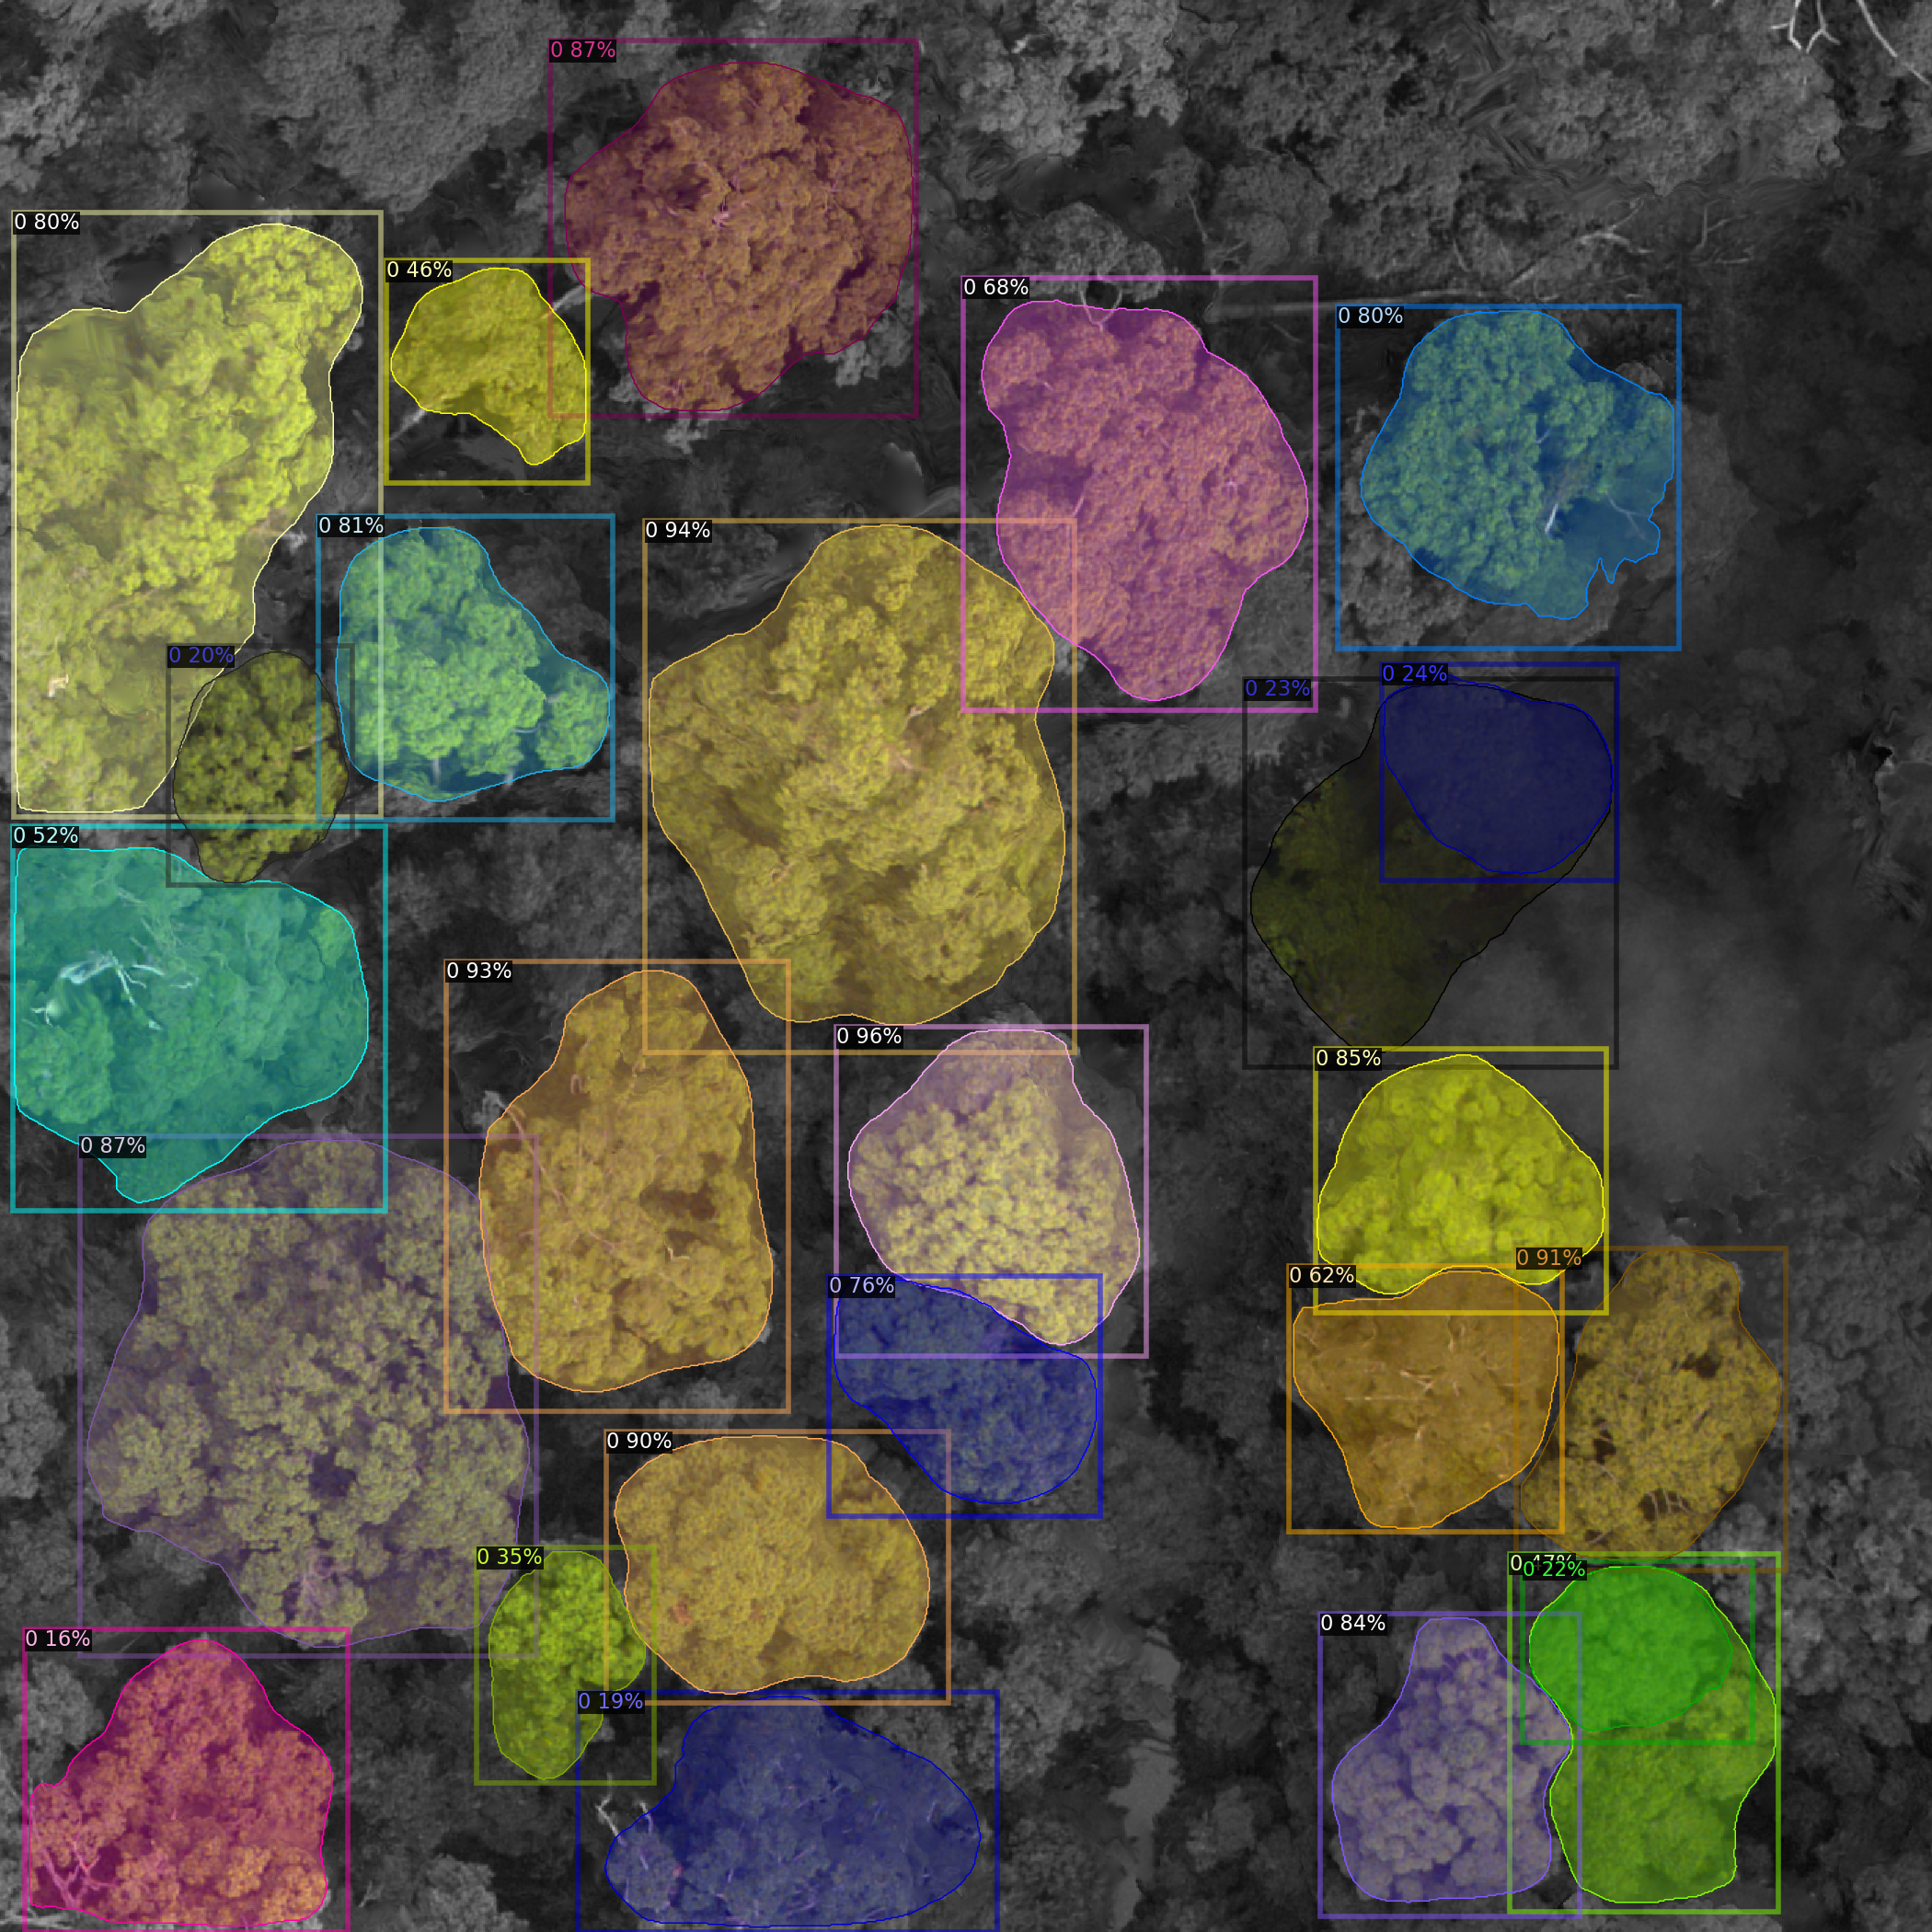

In [10]:
y = model.predict(dataset)